# **Titanic passengers survived**

**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

**Taking care of missing Data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

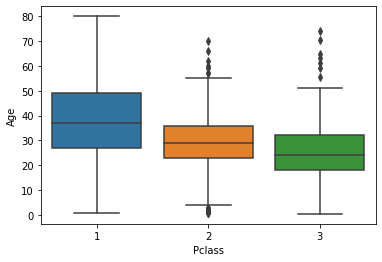

In [6]:
sns.boxplot(x='Pclass',  y='Age',  data = data)

In [7]:
# data age-mean
print(data[data['Pclass'] == 1] ['Age'].mean())
print(data[data['Pclass'] == 2] ['Age'].mean())
print(data[data['Pclass'] == 3] ['Age'].mean())  

38.233440860215055
29.87763005780347
25.14061971830986


In [8]:
def fill_na_velue(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return round(data[data['Pclass'] == 1] ['Age'].mean())

    elif pclass == 2:
      return round(data[data['Pclass'] == 2] ['Age'].mean())
     
    elif pclass == 3:
      return round(data[data['Pclass'] == 3] ['Age'].mean())
      
  else:
    return age

data['Age'] =   data[['Age' , 'Pclass']].apply(fill_na_velue, axis=1 ) 


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

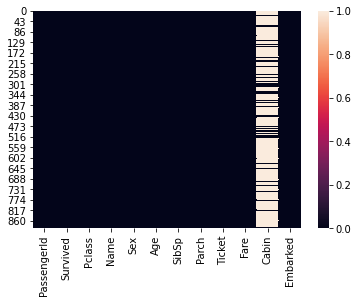

In [10]:
sns.heatmap(data.isnull())

In [11]:
data.drop(['Cabin'], axis=1, inplace=True)


In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Groupby matrix**

In [15]:
#group by Survived

data.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,29.787796,0.553734,0.329690,22.117887
1,444.358824,1.955882,28.299029,0.476471,0.467647,48.209498


In [16]:
#group by Sex

data.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,430.932692,0.740385,2.166667,27.685897,0.698718,0.653846,44.252124
male,454.147314,0.188908,2.389948,30.047088,0.429809,0.235702,25.523893


# **Correletion Matrix & Heatmap**

In [17]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.032474,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.054934,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.401322,0.081656,0.016824,-0.548193
Age,0.032474,-0.054934,-0.401322,1.000000,-0.242834,-0.174280,0.118205
SibSp,-0.057686,-0.034040,0.081656,-0.242834,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.174280,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.118205,0.160887,0.217532,1.000000


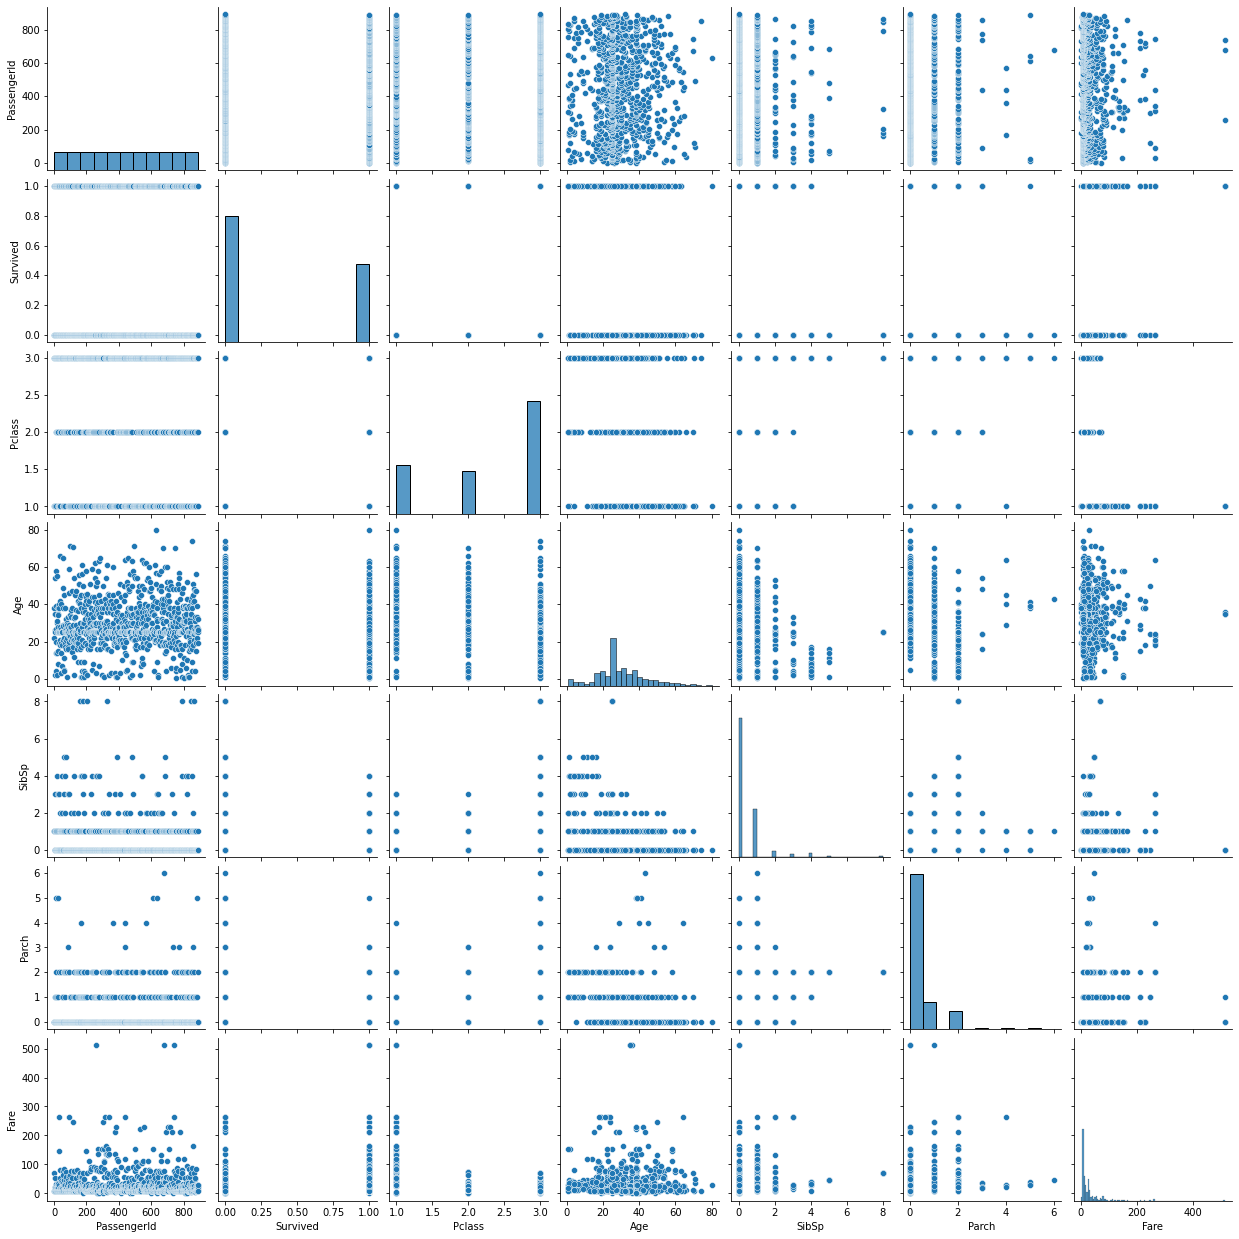

In [18]:
sns.pairplot(data)

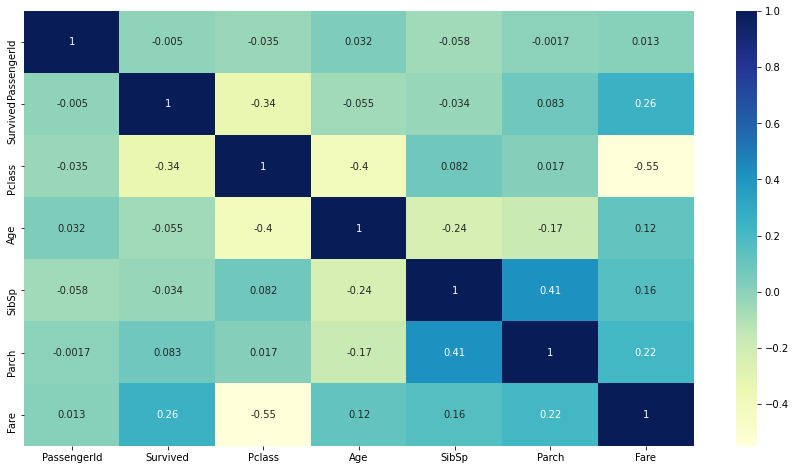

In [19]:
#Heat Map

plt.subplots(figsize=(15,8))

sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

# **Variable reletion and visulizetion**

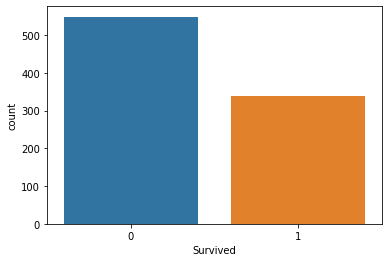

In [20]:
sns.countplot(x = 'Survived', data = data )

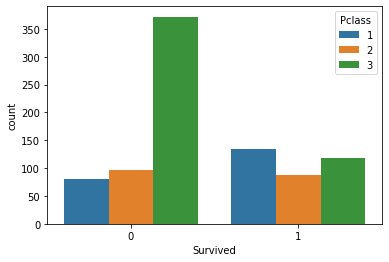

In [21]:
sns.countplot(x = 'Survived', data = data, hue = 'Pclass' )

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


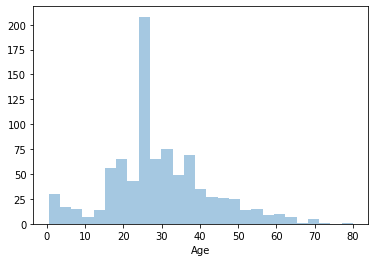

In [22]:
sns.distplot(data['Age'], kde = False)

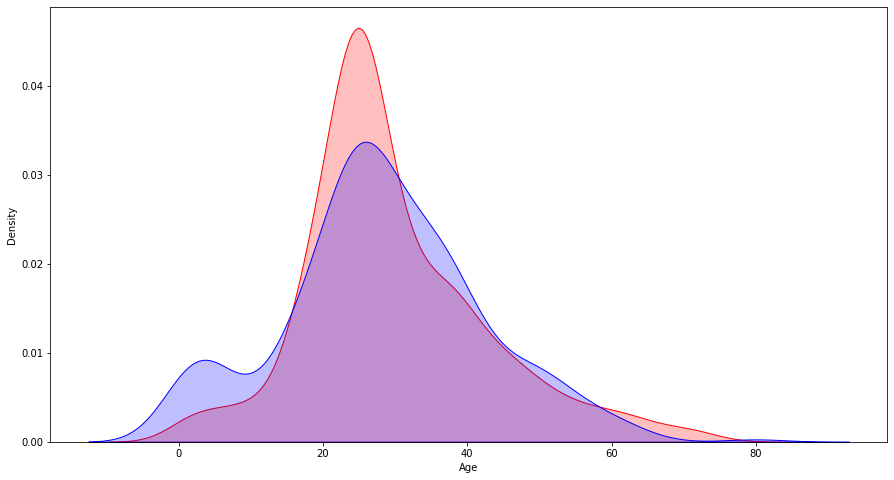

In [23]:
#Age and Survived

plt.subplots(figsize = (15,8))

sns.kdeplot(data.loc[(data['Survived']==0),'Age'], color='r', shade=True, Label='Non Suevived')
sns.kdeplot(data.loc[(data['Survived']==1),'Age'], color='b', shade=True, Label='Suevived')

# **Encoding Catagorical Data**


In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [26]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [28]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [29]:
embarked = pd.get_dummies(data['Embarked'], drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [30]:
sex = pd.get_dummies(data['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [31]:
data.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [32]:
data = pd.concat([data,sex,embarked],axis=1)

In [33]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [34]:
data = data.rename(columns={'male':'Sex'})

In [35]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# **Splitting Data & Apply Algoridham**

In [36]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

**Feature scalling**

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Algoridham**

In [39]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[42 11]
 [13 23]]


0.7303370786516854

In [41]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.50 %
Standard Deviation: 4.90 %


In [42]:
    from sklearn.model_selection import GridSearchCV
    parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                  {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
    grid_search = GridSearchCV(estimator = classifier,
                               param_grid = parameters,
                               scoring = 'accuracy',
                               cv = 10,
                               n_jobs = -1)
    grid_search.fit(X_train, y_train)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
    print("Best Parameters:", best_parameters)

Best Accuracy: 84.12 %
Best Parameters: {'C': 0.25, 'gamma': 0.1, 'kernel': 'rbf'}
